In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt

In [2]:
ans = pd.read_csv('../input/answers.csv')
q = pd.read_csv('../input/questions.csv')
prof = pd.read_csv('../input/professionals.csv')
st = pd.read_csv('../input/students.csv')

In [3]:
print("Number of students: ",len(st['students_id'].unique()))
print("Number of professionals: ",len(prof['professionals_id'].unique()))

# Questions
print("Number of questions: ",len(q['questions_id'].unique()))
print("Number of people that have put at least one question: ",
      len(q['questions_author_id'].unique()))
print("Average number of questions per student: ",
     np.round(q.groupby('questions_author_id').count()['questions_id'].mean(),2))

# Answers
print("Number of answers: ",len(ans['answers_id'].unique()))
print("Number of people that have written at least one answer: ",
      len(ans['answers_author_id'].unique()))
print("Average number of answers per professional: ",
     np.round(ans.groupby('answers_author_id').count()['answers_id'].mean(),2))

Number of students:  30971
Number of professionals:  28152
Number of questions:  23931
Number of people that have put at least one question:  12329
Average number of questions per student:  1.94
Number of answers:  51123
Number of people that have written at least one answer:  10169
Average number of answers per professional:  5.03


#### QA: Questions + Answers

In [4]:
qa = q.merge(right = ans, how = 'outer', left_on = 'questions_id' ,right_on = 'answers_question_id')

In [21]:
# Questions
print("QA shape: ", qa.shape)
 # qa.loc[qa['answers_id'].isnull()].head(n = 2)
num_q_no_ans = qa.loc[qa['answers_id'].isnull()].shape[0]
print("Number of Questions without answer: ", num_q_no_ans)
perc_q_no_ans = np.round(num_q_no_ans*100/qa.shape[0],2)
print("Perc. Questions without Answer: {}% ".format(perc_q_no_ans))

# Answers
print("Number of Answers without questions: ", qa.loc[qa['questions_id'].isnull()].shape[0])

QA shape:  (51944, 10)
Number of Questions without answer:  821
Perc. Questions without Answer: 1.58% 
Number of Answers without questions:  0


In [7]:
key_var = 'answers_author_id'
vars_unique = list(qa)
vars_unique.remove(key_var)
kpi_prof = qa.groupby([key_var])[vars_unique].nunique()
kpi_prof = kpi_prof.reset_index()
kpi_prof.head(3).T

,0,1,2
answers_author_id,00009a0f9bda43eba47104e9ac62aff5,000d4635e5da41e3bfd83677ee11dda4,00271cc10e0245fba4a35e76e669c281
questions_id,3,3,24
questions_author_id,3,3,18
questions_date_added,3,3,24
questions_title,3,3,24
questions_body,3,3,24
answers_id,3,3,24
answers_question_id,3,3,24
answers_date_added,3,3,24
answers_body,3,3,24


In [8]:
kpi_prof['st_over_qs'] = kpi_prof['questions_author_id'] / kpi_prof['questions_id']

In [9]:
print("Max number of questions answered per professional: ", kpi_prof['questions_id'].max())

Max number of questions answered per professional:  1686


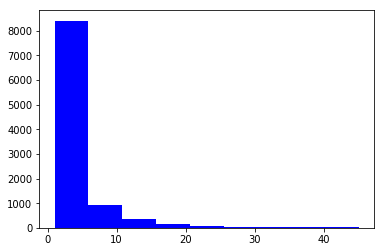

In [10]:
# Most of the professionals have asked a very few questions
plt.hist(kpi_prof['questions_id'], facecolor='blue', density = False, 
         bins = np.linspace(1,50,10,endpoint=False))
plt.show()

#### QAP: Questions + Answers + Professionals

In [11]:
qap = qa.merge(prof, left_on = 'answers_author_id', right_on = 'professionals_id',
                    how = 'outer')

In [12]:
print("QA+P shape: ", qap.shape)
print("Num. answers without author:", qap[qap.professionals_id.isnull()].shape[0])
prof_no_ans = qap.loc[qap.answers_author_id.isnull()].professionals_id.unique()
prof_ans = qap.loc[~qap.answers_author_id.isnull()].professionals_id.unique()
print("Num. prof with 0 answers:", len(prof_no_ans))
print("Num. prof with at least one answer:", len(prof_ans))

QA+P shape:  (70029, 15)
Num. answers without author: 1838
Num. prof with 0 answers: 18086
Num. prof with at least one answer: 10068


#### QAPS: Questions + Answers + Professionals + Students

In [13]:
qaps = qap.merge(st, left_on = 'questions_author_id', right_on = 'students_id',
                    how = 'outer')

In [19]:
print("QAPS shape: ", qaps.shape)
print("Num. questions without author:", qaps[qaps.students_id.isnull()].shape[0])
st_no_q = qaps.loc[qaps.students_id.isnull()].students_id.unique()
st_q = qaps.loc[~qaps.students_id.isnull()].students_id.unique()
print("Num. students with 0 questions:", len(st_no_q), " --> these are those obs with student NaN")
print("Num. students with at least one question:", len(st_q))

QAPS shape:  (88696, 18)
Num. questions without author: 18498
Num. students with 0 questions: 1  --> these are those obs with student NaN
Num. students with at least one question: 30971
